<a href="https://colab.research.google.com/github/yuna1998/datamining/blob/main/Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bagging and RFs

randomForest or ranger packages : ranger package can perform parallel computation

In [1]:
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [ ]:
hdata = read.csv(file = "Heart.csv", header = T, stringsAsFacotrs = T)

In [ ]:
head(hdata)

In [ ]:
hdata$X = NULL

In [ ]:
str(hdata)

check missing

In [ ]:
sum(is.na(hdatas))

small number of missing - > remove them

In [ ]:
hdata = na.omit(hadta)

In [ ]:
n = dim(hdata)[1]

In [ ]:
n

13 predictors and a binary response

In [ ]:
set.seed(10)

In [ ]:
train = sample(n, n/2)
htrain = hdata[train,]
htest = hdata[-train,]

In [ ]:
hb =randomForest(AHD~., data = htrain, mtry = 13, importance =T )

In [ ]:
hb

In [ ]:
predb = predict(hb, newdata = htest)

In [ ]:
predb

In [ ]:
mean(predb!=htest$AHD) #test classification error estimate for bagging

In [ ]:
sqrt(13)

In [ ]:
hrf =randomForest(AHD~., data = htrain, mtry = 4, importance =T )

In [ ]:
hrf

In [ ]:
predrf = predict(hrf, newdata = htest)

In [ ]:
predrf

In [ ]:
mean(predrf != htest$AHD) #test classification error estimate for rf

In [ ]:
hrf$err

In [ ]:
we may want to tune mtry by OOB errors

In [ ]:
error = numeric()

In [ ]:
for (i in 1 : 13){
    f = randomForest(AHD~., data = htrain, mtry = i, importance = T)
    err[i] f$err[500,1]
}

In [ ]:
which.min(err)

In [ ]:
hrf = randomForest(AHD~., data = htrain, mtry = 2, importance = T)
hrf

In [ ]:
predrf = predict(hrf, newdata = htest)
predrf

In [ ]:
mean(predrf != htest$AHD) #test classification error estimate for rf with m=2

In [ ]:
importance(hrf)
varImpPlot(hrf)

regression bagging RFs

In [3]:
library(MASS)

In [12]:
dim(Boston)[1] -> n

In [5]:
n

[1] 506

In [6]:
sum(is.na(Boston))

[1] 0

In [7]:
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [8]:
set.seed(10)

In [13]:
train = sample(n, n/2)

In [14]:
btrain = Boston[train,]

In [15]:
btest = Boston[-train,]

In [16]:
bb = randomForest(medv~., data = btrain, mtry = 13, importance = T)

In [17]:
bb


Call:
 randomForest(formula = medv ~ ., data = btrain, mtry = 13, importance = T) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 13

          Mean of squared residuals: 11.68507
                    % Var explained: 84.78

In [18]:
pb = predict(bb, newdata = btest)

In [20]:
mean( (pb-btest$medv)^2) #test MSE

[1] 13.76681

In [21]:
sqrt(mean( (pb-btest$medv)^2)) # test  RMSE

[1] 3.710366

In [23]:
brf = randomForest(medv~., data = btrain, mtry = 4, importance = T)
brf
prf = predict(brf, newdata = btest)
mean((prf-btest$medv)^2)
sqrt(mean((prf-btest$medv)^2))


Call:
 randomForest(formula = medv ~ ., data = btrain, mtry = 4, importance = T) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 12.26687
                    % Var explained: 84.03

[1] 13.46026

[1] 3.668822

In [24]:
cor(prf, btest$medv)

[1] 0.9369665

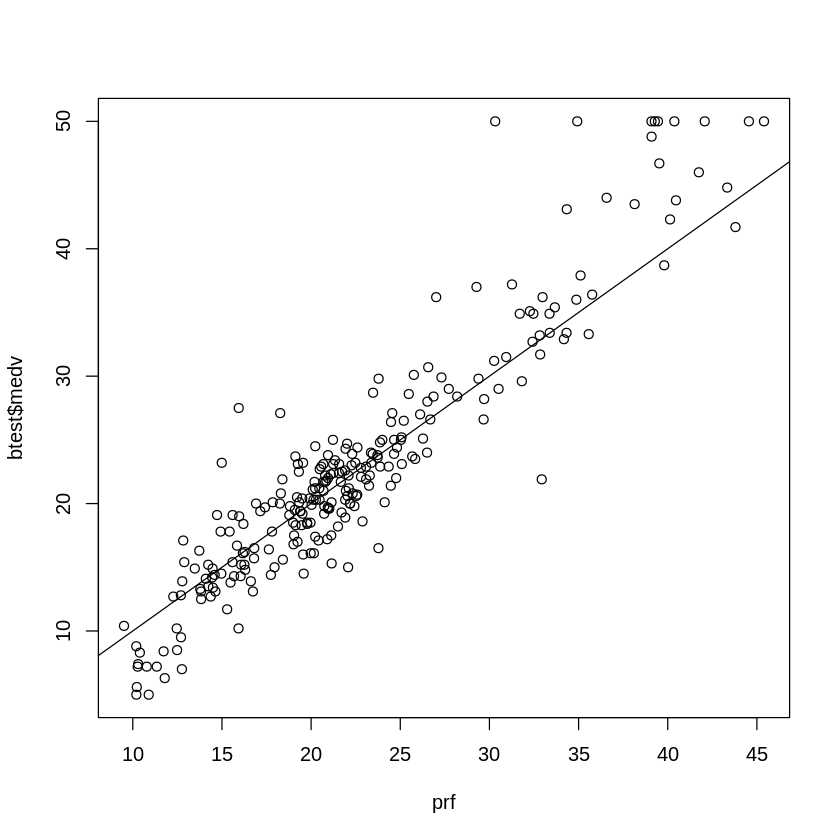

In [27]:
plot(prf, btest$medv)
abline(0,1)

In [28]:
importance(brf)

,%IncMSE,IncNodePurity
crim,13.621071,1340.1894
zn,5.437845,258.0891
indus,10.296384,1078.7063
chas,3.745029,113.0382
nox,12.875510,1216.4255
rm,32.065028,5031.9006
age,10.561017,610.3803
dis,9.837023,959.9739
rad,4.941800,156.7917
tax,8.025318,583.5752
